In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from tqdm import tqdm_notebook as tqdm

In [3]:
path_to_train = './'
data = pd.read_csv(path_to_train+'train.csv')
train_dataset_info = []
for name, labels in zip(data['Id'], data['Target'].str.split(' ')):
    train_dataset_info.append({
        'path':os.path.join(path_to_train+'train/', name),
        'labels':np.array([int(label) for label in labels])})
train_dataset_info = np.array(train_dataset_info)

In [4]:
train_dataset_info

array([{'path': './train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0', 'labels': array([16,  0])},
       {'path': './train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0', 'labels': array([7, 1, 2, 0])},
       {'path': './train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0', 'labels': array([5])},
       ...,
       {'path': './train/fff189d8-bbab-11e8-b2ba-ac1f6b6435d0', 'labels': array([7])},
       {'path': './train/fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0', 'labels': array([25,  2, 21])},
       {'path': './train/fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0', 'labels': array([2, 0])}],
      dtype=object)

In [5]:
%matplotlib inline
import cv2

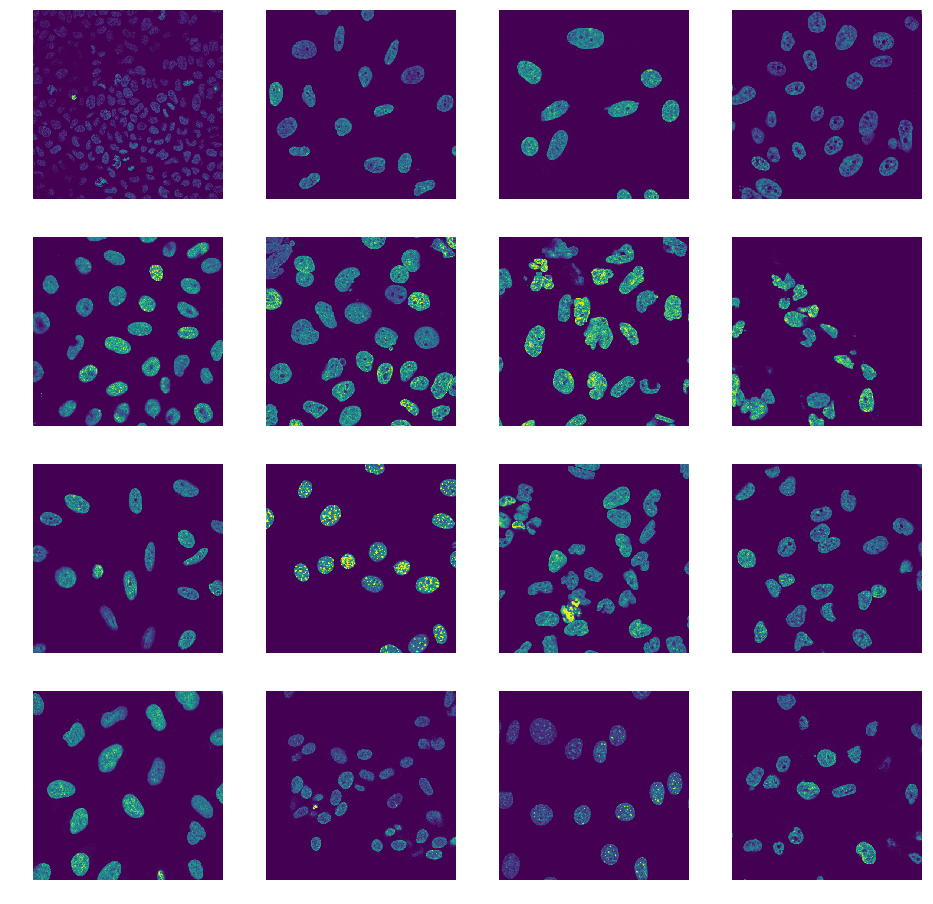

In [38]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_blue.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype(np.int)
            
            plt.imshow(img)
    plt.show()
display_imgs(0)

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\thresh.cpp:1406: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function cv::threshold


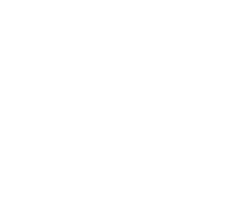

In [39]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_blue.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype(np.int)
            thresh,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            plt.imshow(img)
    plt.show()
display_imgs(0)